In [1]:
# imports
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import env

#import wrangle

## I. Acquire Data

In [2]:
# Import existing CSV files into Python using Pandas
df0 = pd.read_csv('train.csv',sep=';')
df1 = pd.read_csv('test.csv',sep=';')

In [3]:
# Display the first five rows of the dataframe0 by default.
df0.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# Display the first five rows of the dataframe1 by default.

df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## II. Clean & Prepare Data

In [5]:
# Checking the number of rows and columns for df0
df0.shape

(45211, 17)

In [6]:
# Checking the number of rows and columns for df1
df1.shape

(4521, 17)

In [7]:
#checking the DataFrame0 for nulls
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
#checking the DataFrame1 for nulls
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [9]:
#checking the nulls for df0
df0.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
#checking the nulls for df1
df1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
#checking DataFrame0 columns
df0.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [12]:
#checking DataFrame1 columns
df1.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [13]:
# Merge the two datasets together into one.
# Rows from each dataset will be aligned by columns

df = pd.merge(df0,df1)

In [14]:
# Now display the first five rows of dataframe by default after merging.
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
1,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no
2,57,services,married,secondary,no,162,yes,no,unknown,5,may,174,1,-1,0,unknown,no
3,57,technician,married,secondary,no,839,no,yes,unknown,5,may,225,1,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [15]:
# Display the number of rows and columns
df.shape

(4521, 17)

## III. Exploratory Data Analysis

### 1.What is the relationship between clients and their occupation?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'entrepreneur'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'services'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'admin.'),
  Text(5, 0, 'self-employed'),
  Text(6, 0, 'management'),
  Text(7, 0, 'housemaid'),
  Text(8, 0, 'retired'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'student'),
  Text(11, 0, 'unknown')])

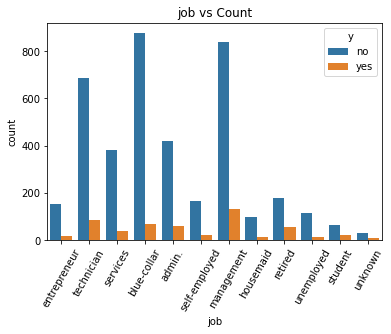

In [16]:
#visualization of occupation by count
sns.countplot(x="job", data = df, hue ="y")
plt.title("job vs Count")
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'management'),
  Text(1, 0, 'blue-collar'),
  Text(2, 0, 'technician'),
  Text(3, 0, 'admin.'),
  Text(4, 0, 'services'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'self-employed'),
  Text(7, 0, 'entrepreneur'),
  Text(8, 0, 'unemployed'),
  Text(9, 0, 'housemaid'),
  Text(10, 0, 'student'),
  Text(11, 0, 'unknown')])

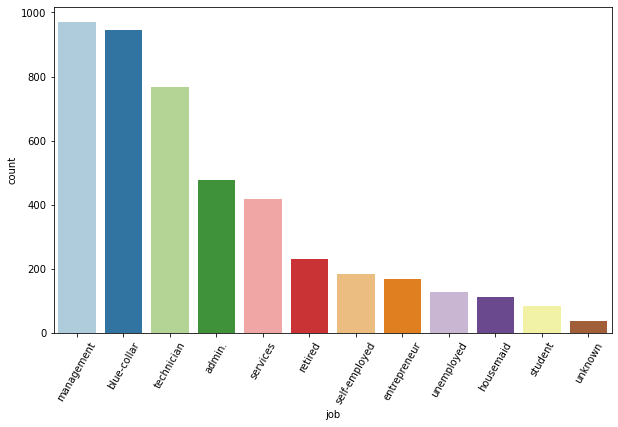

In [17]:
# Visualization of occupation in a discending order
plt.figure(figsize=(10,6))
sns.countplot(x = 'job',
              data = df, 
              order = df['job'].value_counts().index, palette=sns.color_palette('Paired'))
plt.xticks(rotation=60)

### Findings
Management, blue-collar, technician are the top 3 occupations for banking clients

### 2.How many of the clients are single, married or divorced?

Text(0.5, 1.0, 'Martial Status vs Count')

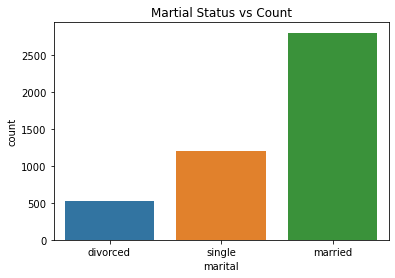

In [18]:
# visualization of marital status by count
sns.countplot(x="marital", data = df)
plt.title("Martial Status vs Count")

### Findings
Most of the clients are married and very few are divorced

### 3.What is the relationship between clients and their education level?

Text(0.5, 1.0, 'Education type vs Count')

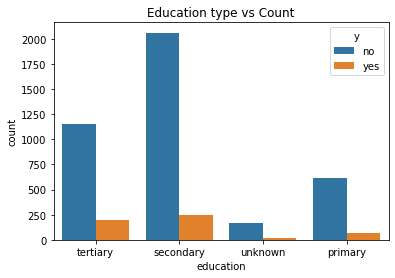

In [19]:
# visualization of education type by count
sns.countplot(x="education",data=df, hue = "y")
plt.title("Education type vs Count")

Text(0, 0.5, 'Count')

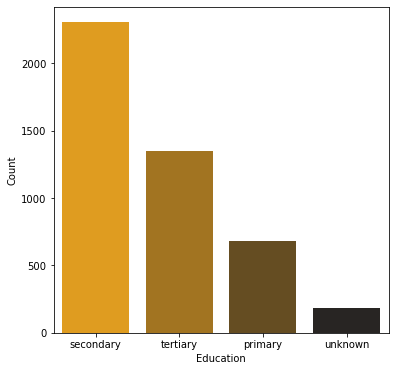

In [20]:
# Visualization of education in a discending order
plt.figure(figsize=(6,6))
sns.countplot(x ='education',
              data=df,
              order=df['education'].value_counts().index,palette='dark:orange_r')
plt.xlabel('Education')
plt.ylabel('Count')

### Findings
Large number of clients have secondary education

### 4.What is the relationship between clients and their housing?

Text(0.5, 1.0, 'housing vs Count')

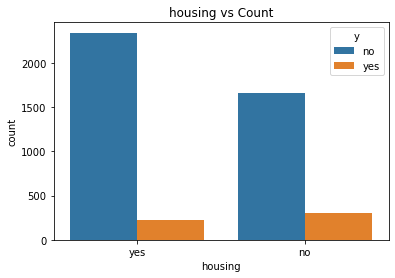

In [21]:
#visualization of housing by count
sns.countplot(x="housing", data = df, hue ="y")
plt.title("housing vs Count")

### Findings
There is a higher proportion of people with a housing loan. 

Text(0.5, 1.0, 'loan vs Count')

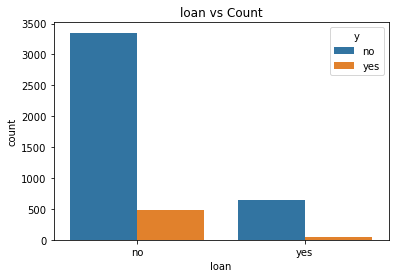

In [22]:
#visualization of loan by count
sns.countplot(x="loan", data = df, hue ="y")
plt.title("loan vs Count")

### Findings
A large number of clients are without personal loan, very few people decided to get personal loans 

Text(0.5, 1.0, 'Contact vs Count')

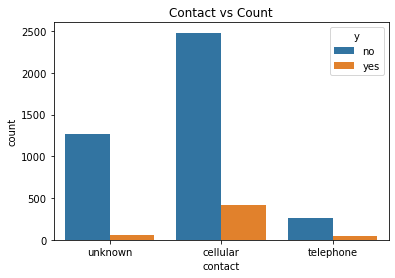

In [23]:
#visualiaztion of contract by count
sns.countplot(x="contact", data = df, hue ="y")
plt.title("Contact vs Count")

### Findings
In the above graph shows that clients who were contacted by cellular got more to a deposit term as compared to clients who were contacted by telephone and other unkown means. 

## Heatmap

<AxesSubplot:>

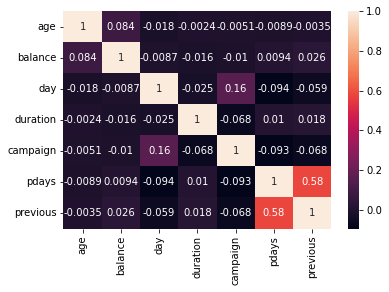

In [24]:
#a heatmap showing correlation between variables.
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot =True)

### Findings
Here, I analyzed 7 factcors using correlation matrix. The studied factors include age, balance, day, duration, campaign, pdays and previous.
Result: Of all these factors, 3 factors (age, balance and day) show a relative strong correlation than the rest.

## Conclusion/Recommendations/Next Steps
### Conclusion:

### Recommendations:

### Next Steps